In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')\

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

/tmp/ipykernel_6448/3798859627.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')\


In [7]:
import matplotlib_inline.backend_inline as bkinl
bkinl.set_matplotlib_formats('svg')

In [13]:
from sklearn.datasets import fetch_openml
iris = fetch_openml('iris')
x = iris['data']
y = iris['target']
x

/home/shay/Desktop/HONS/env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/shay/Desktop/HONS/env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
x_tensor = torch.tensor(x.values).float()
y_tensor = torch.ones(len(y), dtype=torch.long)
y_tensor[y == 'Iris-setosa'] = 0
y_tensor[y == 'Iris-virginica'] = 2

# Train-test-split and DataLoader

In [29]:
batch_size = 16

x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, shuffle=True)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0]) # same as batch_size=len(y)

# Class Based description of model for dropout regularisation

In [59]:
class dropoutModel(nn.Module):
    def __init__(self, dropoutrate : float =0.5, input_layer_size : int = 4):
        super().__init__()
        
        self.inputLayer = nn.Linear(input_layer_size, 12)
        self.hiddenLayer = nn.Linear(12, 12)
        self.output = nn.Linear(12, 3)
        
        self.dr = dropoutrate
        
    def forward(self, x):
        x = F.relu( self.inputLayer(x) )
        x = F.dropout(x, p=self.dr, training=self.training) # switch off dropout when not training or eval() mode in on.
        
        x = F.relu( self.hiddenLayer(x) )
        x = F.dropout(x, p=self.dr, training=self.training)
        
        x = self.output(x)
        return x

### Just Checking wether model works properly or not by one forward pass

In [60]:
test_model = dropoutModel()
test_model.eval()


dropoutModel(
  (inputLayer): Linear(in_features=4, out_features=12, bias=True)
  (hiddenLayer): Linear(in_features=12, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [61]:
test_model(x_train)

tensor([[ 0.3283, -0.0507, -0.1027],
        [ 0.3296, -0.0996, -0.0713],
        [ 0.3291, -0.0947, -0.0808],
        [ 0.3566,  0.0905, -0.3225],
        [ 0.3166,  0.0445, -0.2341],
        [ 0.3478,  0.0757, -0.2968],
        [ 0.3324, -0.1161, -0.0776],
        [ 0.3361,  0.0693, -0.2714],
        [ 0.2992,  0.0147, -0.1777],
        [ 0.3342, -0.1121, -0.0659],
        [ 0.3219,  0.0524, -0.2378],
        [ 0.3501,  0.0842, -0.3215],
        [ 0.3627,  0.1775, -0.3760],
        [ 0.3155,  0.0437, -0.2251],
        [ 0.3654,  0.1691, -0.3960],
        [ 0.3383, -0.1036, -0.0661],
        [ 0.3304,  0.0497, -0.2528],
        [ 0.3064, -0.1037, -0.0465],
        [ 0.3228,  0.0665, -0.2824],
        [ 0.3650, -0.1398, -0.0702],
        [ 0.3871,  0.1612, -0.4675],
        [ 0.3661,  0.1035, -0.3375],
        [ 0.3735,  0.1635, -0.4000],
        [ 0.3627,  0.0899, -0.3320],
        [ 0.3329, -0.1194, -0.0555],
        [ 0.3684,  0.1096, -0.3505],
        [ 0.3572,  0.1513, -0.4037],
 

In [62]:
test_model.train()
test_model = 0

# Create Model and Train Model

In [63]:
ANN_Dropout_model = dropoutModel()
loss_fxn = nn.CrossEntropyLoss()
optmiser = torch.optim.SGD(ANN_Dropout_model.parameters(), lr=0.005)

In [64]:
epoches = 500

train_Accuracy = []
test_Accuracy = []

for epoch in range(epoches):
    batch_accuracy = []
    
    for x, y in train_loader:
        y_ = ANN_Dropout_model(x)
        loss = loss_fxn(y_, y)
        
        optmiser.zero_grad()
        loss.backward()
        optmiser.step()
        
        batch_accuracy.append(100 * torch.mean((torch.argmax(y_, axis=1) == y).float()).item())
        
    train_Accuracy.append( np.mean(batch_accuracy) )
    
    ## Starting Eval Mode for test accuracy
    ANN_Dropout_model.eval()
    x, y = next(iter(test_loader))
    y_ = ANN_Dropout_model(x)
    test_Accuracy.append(100 * torch.mean((torch.argmax(y_, axis=1) == y).float()).item())

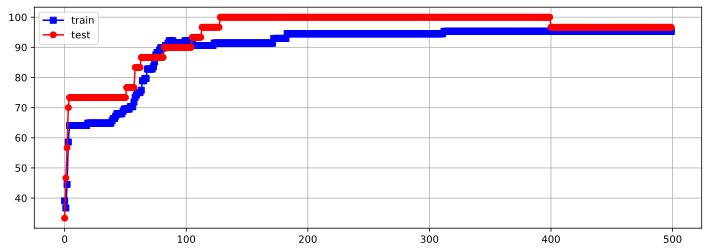

In [65]:
fig = plt.figure(figsize=(12,4))
plt.plot(train_Accuracy, 'bs-')
plt.plot(test_Accuracy, 'ro-')

plt.legend(['train', 'test'])
plt.grid()
plt.show()